<b> Import das Bibliotecas Necessárias Para Análise

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

<b> Análise dos Determinantes de Renda dos LGBTs na Economia Brasileira (Base de Dados Grupo Dignidade)
    
    Problemática: 


<b> Tratamento da Base de Dados

In [2]:
# Leitura dos Dados fornecidos pelo Grupo Dignidade

df = pd.read_excel(r".\Dados.xlsx")

In [3]:
# Tratamento dos nomes dos campos

df = df.rename(columns={
    'Qual sua idade?':'Idade',
    'Em qual Estado você mora?': 'Estado',
    'Qual seu nível de escolaridade?':'Escolaridade',
    'Qual seu Estado Civil?':'Estado Civil',
    'Como você se autodeclara étnica/racialmente?':'Etnia/Cor',
    'Qual sua identidade de gênero?':'Gênero',
    'Qual sua orientação sexual?':'Sexualidade',
    'Com quem você mora?': 'Status Moradia',
    'Qual sua idade?':'Idade',
    'Somando sua renda com a renda das pessoas que moram com você, quanto é, aproximadamente, a renda familiar?':'Renda'})
    

In [4]:
# Mantendo apenas as variáveis que realmente importam 

df = df[['Sexualidade','Gênero','Idade','Status Moradia','Estado','Estado Civil','Etnia/Cor','Escolaridade','Renda']]

In [5]:
# Contabilização 

print('Total de Pessoas na Base:',df['Sexualidade'].count())
print()
print('Total de Heterossexuais cisgêneros na Base:',df[(df['Sexualidade']=='Heterossexual')&((df['Gênero']=='Homem cis')|(df['Gênero']=='Mulher cis'))]['Sexualidade'].count())

Total de Pessoas na Base: 8992

Total de Heterossexuais cisgêneros na Base: 74


In [6]:
# Removendo os Heterossexuais cisgêneros da Base

df = df[~((df['Sexualidade']=='Heterossexual')&((df['Gênero']=='Homem cis')|(df['Gênero']=='Mulher cis')))]
print('Total de Pessoas na Base, sem Hetero cis:',df['Sexualidade'].count())

Total de Pessoas na Base, sem Hetero cis: 8918


<b> Convertendo para Variáveis Nominais

In [7]:
# Transformando em Nominal

gle = LabelEncoder()

c_estadocivil_labels = gle.fit_transform(df['Estado Civil'])
c_estadocivil_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

c_uf_labels = gle.fit_transform(df['Estado'])
c_uf_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

c_etnia_labels = gle.fit_transform(df['Etnia/Cor'])
c_etnia_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

c_moradia_labels = gle.fit_transform(df['Status Moradia'])
c_moradia_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

c_sexualidade_labels = gle.fit_transform(df['Sexualidade'])
c_sexualidade_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

c_genero_labels = gle.fit_transform(df['Gênero'])
c_genero_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

<b> Convertendo para Variáveis Ordinais

In [8]:
# Criando os Campos Equivalentes 

df['c_estadocivil'] = c_estadocivil_labels
df['c_uf'] = c_uf_labels
df['c_etnia'] = c_etnia_labels
df['c_moradia'] = c_moradia_labels
df['c_sexualidade'] = c_sexualidade_labels
df['c_genero'] = c_genero_labels

In [9]:
# Atribuindo Ordinais a Renda (Lembrando que não é Linear)
renda_ord_map = {
       'Nenhuma renda':1,
       'Até 1/2 salário mínimo (até R$ 477,00 inclusive)':2,
       'De 1/2 a 1 salário mínimo (até R$ 954,00 inclusive)':3,
       'De 1 a 2 salários mínimos (de R$ 954,00 até R$ 1.908,00 inclusive)':4,
       'De 2 a 3 salários mínimos (de R$ 1.908,00 até R$ 2.862,00 inclusive)':5,
       'De 3 a 5 salários mínimos (de R$ 2.862,00 até R$ 4.770,00 inclusive)':6,
       'De 5 a 10 salários mínimos (de R$ 4.770,00 até R$ 9.540,00 inclusive)':7,
       'De 10 a 20 salários mínimos (de R$ 9.540,00 até R$ 19.080,00 inclusive)':8,
       'De 20 a 30 salários mínimos (de R$ 19.080,00 até R$ 28.620,00 inclusive)':9,
       'Mais de 30 salários mínimos (mais de R$ 28.620,00)':10,
       }

In [10]:
df['c_renda'] = df['Renda'].map(renda_ord_map)

In [11]:
# Ordenando Escolaridade 

escolaridade_ord_map = {
    
       'Pós-Doutorado Completo':15, 
       'Pós-Doutorado Incompleto':14,
       'Doutorado Completo':13, 
       'Doutorado Incompleto':12,
       'Mestrado Completo':11, 
       'Mestrado Incompleto':10,
       'Especialização Completa':9, 
       'Especialização Incompleta':8,
       'Ensino Superior Completo':7, 
       'Ensino Superior Incompleto':6,
       'Ensino Técnico Completo':5, 
       'Ensino Técnico Incompleto':4,
       'Ensino Médio Completo':3, 
       'Ensino Médio Incompleto':2,
       'Ensino Fundamental Completo':1, 
       'Ensino Fundamental Incompleto':0
                        }

In [12]:
df['c_escolaridade'] = df['Escolaridade'].map(escolaridade_ord_map)

In [13]:
# Ordenando Idade

age_ord_map = {
    
       '70 anos ou mais':7, 'Entre 60 e 69 anos':6, 'Entre 50 e 59 anos':5, 
    'Entre 40 e 49 anos':4, 'Entre 30 e 39 anos':3, 'Entre 25 e 29 anos':2,
    'Entre 20 e 24 anos':1, 'Entre 15 e 19 anos':0
              }

In [14]:
df['c_age'] = df['Idade'].map(age_ord_map)

<b> Construindo os DataFrames para: "LGBT's Dependentes" ; "LGBT's Independentes" ; "LGBT's Independentes e com Cônjuge" </b>

    onde: LGBT's Dependentes moram com os pais, Independentes moram sozinhos/com amigos


In [15]:
# Criação dos DataFrames

df_lgbts_dependentes = df[(df['Status Moradia']=='Com pai(s) e/ou mãe(s) LGBTI+')|
                          (df['Status Moradia']=='Com pai(s) e/ou mãe(s) heterossexuais')|
                          (df['Status Moradia']=='Com parentes heterossexuais')|
                          (df['Status Moradia']=='Com parentes LGBTI+')|
                          (df['Status Moradia']=='Outra situação')]

print('LGBTs Dependentes: ', df_lgbts_dependentes['Sexualidade'].count())

LGBTs Dependentes:  5442


In [16]:
df_lgbts_independentes = df[(df['Status Moradia']=='Com colegas, amigas e/ou amigos LGBTI+')|
                            (df['Status Moradia']=='Com colegas, amigas e/ou amigos heterossexuais')|
                            (df['Status Moradia']=='Sozinha ou sozinho')]

print('LGBTs Independentes: ',df_lgbts_independentes['Sexualidade'].count())

LGBTs Independentes:  2075


In [17]:
df_lgbts_casados = df[(df['Status Moradia']=='Com companheira ou companheiro')|
                      (df['Status Moradia']=='Com filha(s) ou filho(s)')]

print('LGBTs Casados: ',df_lgbts_casados['Sexualidade'].count())

LGBTs Casados:  1401


In [18]:
# Criação dos Campos Segmentados

df_lgbts_dependentes['Situacao'] = 'Dependente'
df_lgbts_independentes['Situacao'] = 'Independente'
df_lgbts_casados['Situacao'] = 'Casados'

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

A Relação entre Escolaridade e Renda é inconclusiva em ambos os casos (aprender a plotar boxplot)


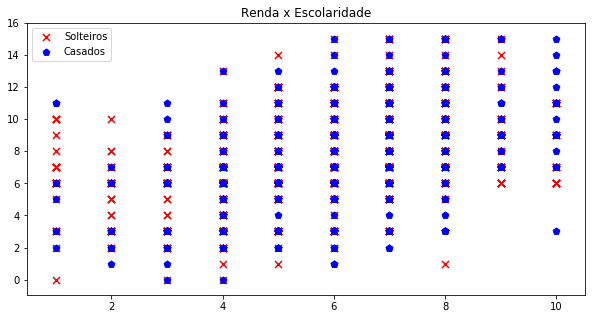

In [19]:
# Plot de Variação Renda / Escolaridade

fig, ax = plt.subplots(figsize=(10,5))
#ax.scatter(df_lgbts_dependentes['c_renda'],df_lgbts_dependentes['c_escolaridade'], s=50, c='b',marker='o',label='Dependentes')
ax.scatter(df_lgbts_independentes['c_renda'],df_lgbts_independentes['c_escolaridade'], s=50, c='r',marker='x',label='Solteiros')
ax.scatter(df_lgbts_casados['c_renda'],df_lgbts_casados['c_escolaridade'], s=50, c='b',marker='p',label='Casados')
ax.legend(loc='best')
ax.set_xlabel=('Renda')
ax.set_ylabel=('Escolaridade')
ax.set_title('Renda x Escolaridade');
print('A Relação entre Escolaridade e Renda é inconclusiva em ambos os casos (aprender a plotar boxplot)')

In [20]:
e0 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==0]['c_renda'])
e1 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==1]['c_renda'])
e2 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==2]['c_renda'])
e3 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==3]['c_renda'])
e4 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==4]['c_renda'])
e5 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==5]['c_renda'])
e6 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==6]['c_renda'])
e7 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==7]['c_renda'])
e8 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==8]['c_renda'])
e9 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==9]['c_renda'])
e10 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==10]['c_renda'])
e11 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==11]['c_renda'])
e12 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==12]['c_renda'])
e13 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==13]['c_renda'])
e14 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==14]['c_renda'])
e15 = (df_lgbts_independentes[df_lgbts_independentes['c_escolaridade']==15]['c_renda'])

In [21]:
valores = [e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15]

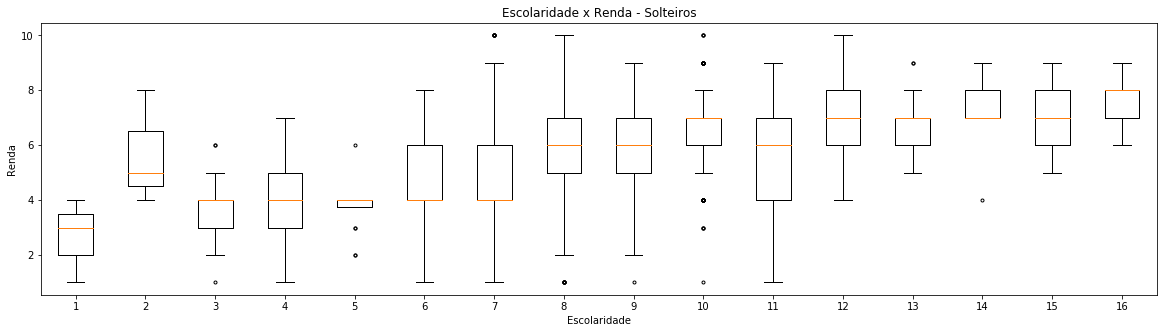

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
pos = np.array(range(len(valores))) + 1
bp = ax.boxplot(valores)

ax.set_xlabel('Escolaridade')
ax.set_ylabel('Renda')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.title('Escolaridade x Renda - Solteiros')
plt.show()

In [23]:
df['Escolaridade'].unique()

array(['Ensino Superior Completo', 'Ensino Médio Incompleto',
       'Ensino Técnico Completo', 'Doutorado Incompleto',
       'Mestrado Completo', 'Ensino Superior Incompleto',
       'Mestrado Incompleto', 'Doutorado Completo',
       'Especialização Incompleta', 'Ensino Médio Completo',
       'Especialização Completa', 'Ensino Fundamental Completo',
       'Pós-Doutorado Incompleto', 'Pós-Doutorado Completo',
       'Ensino Técnico Incompleto', 'Ensino Fundamental Incompleto'],
      dtype=object)

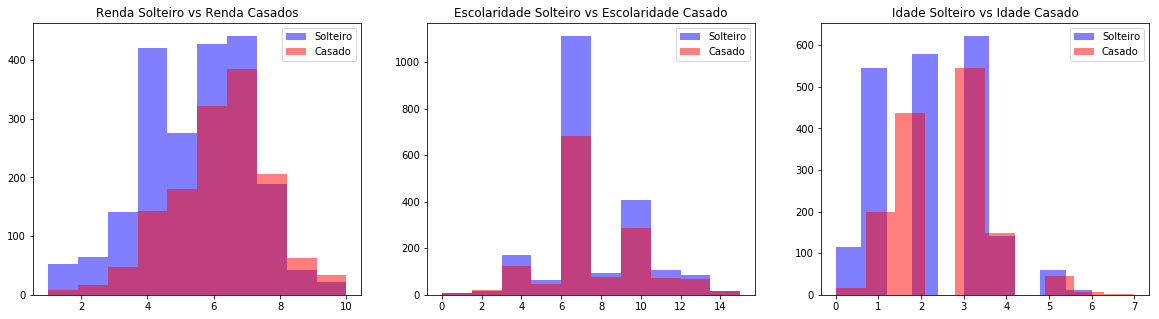

In [24]:
# Dist Renda para Solteiros Independentes e Casados

fig, axes = plt.subplots(1,3,sharey=False, sharex=False,figsize=(20,5))
axes[0].hist(df_lgbts_independentes['c_renda'], color='b', label='Solteiro', alpha=0.5)
axes[0].hist(df_lgbts_casados['c_renda'], color='r', label= 'Casado', alpha=0.5)
axes[0].legend(loc='best')
axes[0].set_title('Renda Solteiro vs Renda Casados');

axes[1].hist(df_lgbts_independentes['c_escolaridade'], color='b', label='Solteiro', alpha=0.5)
axes[1].hist(df_lgbts_casados['c_escolaridade'], color='r', label= 'Casado', alpha=0.5)
axes[1].legend(loc='best')
axes[1].set_title('Escolaridade Solteiro vs Escolaridade Casado');

axes[2].hist(df_lgbts_independentes['c_age'], color='b', label='Solteiro', alpha=0.5)
axes[2].hist(df_lgbts_casados['c_age'], color='r', label= 'Casado', alpha=0.5)
axes[2].legend(loc='best')
axes[2].set_title('Idade Solteiro vs Idade Casado');

<b> Análise de Correlação de Variáveis

In [25]:
# Criando um DataFrame apenas com LGBT Independentes e Casados

df_usual = pd.concat([df_lgbts_independentes,df_lgbts_casados])

In [26]:
# Análise de Correlação entre as três variáveis de Mincer 

corr = df_usual[['c_renda','c_escolaridade','c_age']].corr()
corr.style.background_gradient(cmap='coolwarm')

,c_renda,c_escolaridade,c_age
c_renda,1,0.452305,0.404522
c_escolaridade,0.452305,1,0.356851
c_age,0.404522,0.356851,1


# --------------------------------------------------------------------------------------------------------------

<B> EQUAÇÃO DE SALÁRIOS MINCERIANA: ln w = β0 + β1 educ + β2 exp + β3 exp² + γ′ x + є </B>
 Onde: 
 * w é o salário recebido pelo indivíduo,
 * educ é a sua escolaridade, geralmente medida por anos de estudo
 * exp é sua experiência, geralmente aproximada pelo idade do indivíduo
 * x é um vetor de características observáveis do indivíduo:
     - Sexualidade
     - Gênero
     - Etnia/Cor
     - Região

<b> Anos de Estudo: </b> sem
instrução (menos de 1 ano e sem instrução), ensino fundamental incompleto
(1 a 8 anos de estudo), ensino fundamental completo (8 a 10 anos de estudo),
ensino médio completo (11 a 14 anos de estudo) e ensino superior completo
(15 anos ou mais de estudo). A contagem dos anos de estudo tem início em 1
ano, a partir da 1ª série concluída com aprovação do ensino fundamental ou do
elementar e, assim, sucessivamente.

<i> Fonte: IBGE

CRIANDO O CAMPO ANOS DE ESTUDO COM BASE NA ESCOLARIDADE E USANDO AS PREMISSAS DA PNAD (VARIÁVEL CONTÍNUA)

In [27]:
df_usual['Anos de Estudo'] = df_usual['Escolaridade']

In [29]:
df_usual['Anos de Estudo'] = df_usual['Anos de Estudo'].replace(
    {'Pós-Doutorado Completo':25,
     'Pós-Doutorado Incompleto':23,
     'Doutorado Completo':21,
     'Doutorado Incompleto':19,
     'Mestrado Completo':17,
     'Mestrado Incompleto':16,
     'Especialização Completa':17,
     'Especialização Incompleta':16,
     'Ensino Superior Completo':15,
     'Ensino Superior Incompleto':13,
     'Ensino Técnico Completo':13,
     'Ensino Técnico Incompleto':12,
     'Ensino Médio Completo':11,
     'Ensino Médio Incompleto':10,
     'Ensino Fundamental Completo':8,
     'Ensino Fundamental Incompleto':6})

<b> CRIANDO O CAMPO EXPERIÊNCIA COM BASE NO PONTO MÉDIO DA IDADE DA FAIXA (VARIÁVEL CONTÍNUA)

In [43]:
df_usual['Experiência'] = df_usual['Idade']

In [44]:
df_usual['Experiência'] = df_usual['Experiência'].replace(
    {'70 anos ou mais': 70-18,
     'Entre 60 e 69 anos':64.5-18,
     'Entre 50 e 59 anos':54.5-18,
     'Entre 40 e 49 anos':44.5-18,
     'Entre 30 e 39 anos':34.5-18,
     'Entre 25 e 29 anos':27-18,
     'Entre 20 e 24 anos':22-18,
     'Entre 15 e 19 anos':18-18})

In [45]:
df_usual['Experiência²'] = df_usual['Experiência'] * df_usual['Experiência']

<b> DEFININDO O COMPOSTO DE VARIÁVEIS PARA APLICAÇÃO DO MODELO MINCERIANO </b>

In [103]:
features = df_usual[['Anos de Estudo','Experiência','Experiência²','c_sexualidade','c_genero','c_etnia','c_uf','c_renda']]

#features = df_usual[['Status Moradia','Anos de Estudo','Experiência','c_sexualidade','c_genero','c_etnia','c_uf','c_renda']]
#features = features.set_index('Status Moradia')

In [104]:
features.head()

,Anos de Estudo,Experiência,Experiência²,c_sexualidade,c_genero,c_etnia,c_uf,c_renda
7,19,4.0,16.00,4,6,1,25,8
11,17,16.5,272.25,2,3,5,20,7
13,13,9.0,81.00,2,3,1,5,4
17,16,16.5,272.25,4,6,1,13,7
22,16,16.5,272.25,0,6,1,19,7


In [105]:
n_features = len(features.columns)-1

X = np.array(features[['Anos de Estudo','Experiência','Experiência²']])
y = np.log(np.array(features['c_renda']))

<b> PADRONIZAÇÃO DAS VARIÁVEIS - DEU ERRADO

In [100]:
scaler = StandardScaler()

In [101]:
scaler.fit(X)
X = scaler.transform(X)

In [106]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 2.589e+04
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:10:39   Log-Likelihood:                -1385.3
No. Observations:                3476   AIC:                             2777.
Df Residuals:                    3473   BIC:                             2795.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0992      0.001     85.956      0.000       0.097       0.101
x2             0.0254      0.002     11.591      0.000       0.021       0.030
x3            -0.0005   5.72e-05     -8.342      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      936.000   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3528.569
Skew:                          -1.293   Prob(JB):                         0.00
Kurtosis:                       7.204   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> CRIANDO A REGRESSÃO PARA LOCALIZAR OS BETAS

In [37]:
X = features_std[['Anos de Estudo','Experiência','Experiência²']]
y = np.log(features_std['c_renda'])

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<b> CRIANDO AS VARIÁVEIS W, EDUC E EXP

In [116]:
n_features = len(features_std.columns)-1

w = np.log(np.array(features['c_renda']))
educ = np.array(features_std['Anos de Estudo'])
exp = np.array(features_std['Experiência'])
exp2 = np.array(features_std['Experiência']*features_std['Experiência'])
#yx = np.array(features_std.drop(['c_renda','Anos de Estudo','Experiência'],1))
X = educ,exp,exp2

CRIANDO O VETOR DE CARACTERÍSTICAS OBSERVÁVEIS

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(yx)  

GUARDANDO MÉDIA E DESVIO PADRÃO ANTES DE PADRONIZAR

In [ ]:
educ_mean = educ.mean(axis=0)
educ_std = educ.std(axis=0)

exp_mean = exp.mean(axis=0)
exp_std = exp.std(axis=0)

yx_mean = yx.mean(axis=0)
yx_std = yx.std(axis=0)

print(educ_mean,educ_std,exp_mean,exp_std,yx_mean,yx_std)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

CRIAÇÃO DO INTERCEPTO (QUANDO X0 =1)

In [ ]:
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X),axis=1)

CRIANDO A REGRESSÃO PARA LOCALIZAR OS BETAS

In [ ]:
features['Experiência²'] = features['Experiência'] * features['Experiência']

In [ ]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()